# Predicting Heart Disease using Machine Learning 

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build
a machine learning model capable of predicting whether or not someone has heart disease based on their medical reports(attributes).

The steps involved in building this classification model are:

1. Problem definition 
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Statement

In a statement:
> Given clinical parameters about the patient, can we predict whether they have heart disease or not?

## 2. Data

The Original data came from the cleavland data from UCI Machine Learning Repository.https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether the patients has heart disease or not during the proof of concept,we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. It can be done by doing research(such as looking at the above links) or by talking to a subject matter expert(someone who knows about the dataset).


**create data dictionary**

Data Dictionary

1. age: age in years.

2. sex: ( 1 = male; 0 = female)

3. cp- Chest-pain type
 * 0 = Typical angina: chest pain related to decrease in blood supply to the heart 
 * 1 = Atypical angina: chest pain not related to heart
 * 2 = Non—anginal pain: typically esophageal spasms (non heart related)
 * 3 = Asymptotic: chest: chest pain not showing signs of disease

4. trestbps- Resting Blood Pressure(in mmHg (unit) on admission to the hospital) anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol in mg/dl
* serum = LDL + HDL + .2* triglycerides
* above 200 is cause for concern

6. fbs- (Fasting Blood Sugar > 120mg/dl) (1=true;0=false )
* ">126" mg/dL signals diabetes

7. restecg-  resting electrocardiographic(ECG) results
* 0 = normal(Nothing to note)
* 1 = having ST-T wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
* 2 = Possible or definite left ventricular hyperthrophy
    * Enlarged heart's main pumping chamber

8. thalach- Max heart rate achieved

9. exang- Exercise induced angina (1 = yes; 0 = no)

10. oldpeak- ST(segment) depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope- Slope of the peak exercise ST segment 
 * 0 = Upsloping: better heart rate with excercise (uncommon) 
 * 1 = Flatsloping: minimal change (typical healthy heart) 
 * 2 = Downsloping: signs of unhealthy heart

12. ca- number of major vessels (0–3) colored by flourosopy 
  * Coloured vessel means the doctor can see the blood passing through
  * The more blood movement the better (no clots)

13. thal : thalium stress result
* 1,3 = normal 
* 6 = fixed defect: used to be defect but ok now
* 7 = reversible defect: no proper blood movement when excercising

14. target : have disease or not (1=yes; 0=no) (= the predicted attribute)



## Preparing the tools

Tools like pandas,numpy and matplotlib are used for data analysis and manipulation

In [1]:
# Import all the needed tools

#Regular EDA(Exploratory data analysis) and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Model from Scikit-Learn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find the out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add,chnage or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# find out how many of each class are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

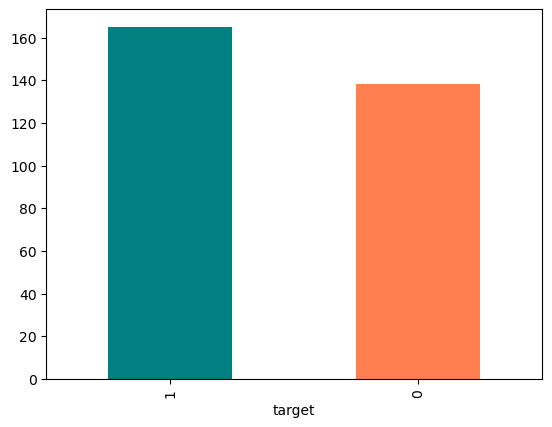

In [7]:
df["target"].value_counts().plot(kind="bar",color=["teal","coral"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex


In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


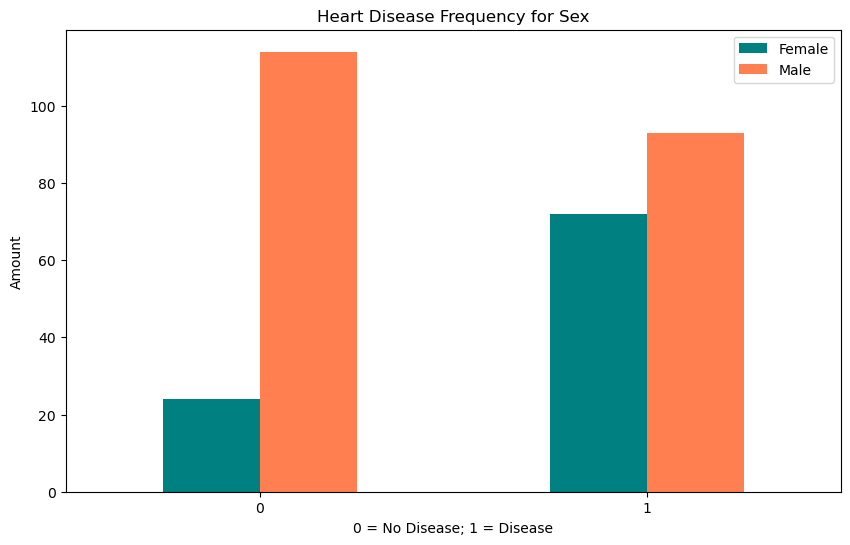

In [13]:
# create a plot for cross tab

pd.crosstab(df.target,df.sex).plot(kind="bar",color=["teal","coral"],figsize=(10,6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease; 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Comparing target vs cp

In [14]:
pd.crosstab(df.cp,df.target) # cp - chest pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


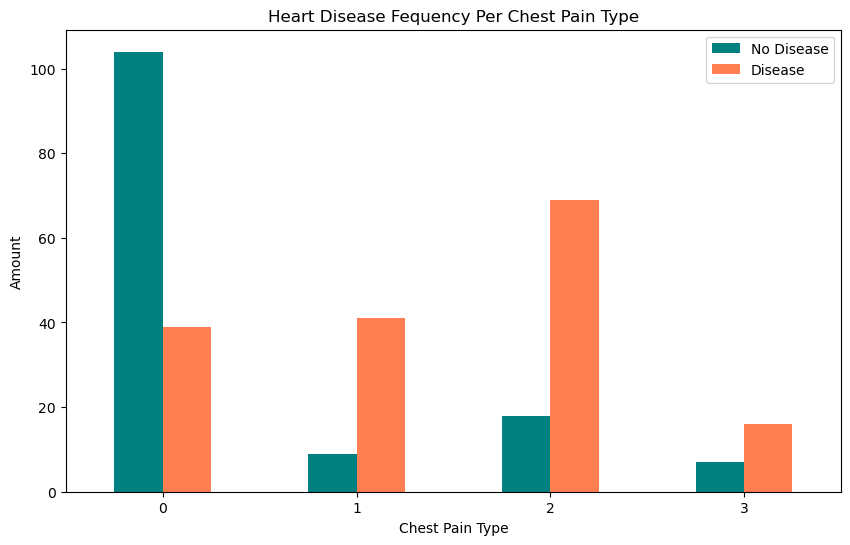

In [15]:
# plotting (oo method)


# data
data = pd.crosstab(df.cp,df.target)

# create a plot
fig,ax = plt.subplots(figsize=(10,6))

# plot the data
data.plot(kind="bar",ax=ax,color=["teal","coral"])

# Customize the plot
ax.set(title="Heart Disease Fequency Per Chest Pain Type",
      xlabel="Chest Pain Type",
      ylabel="Amount")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(["No Disease","Disease"]);


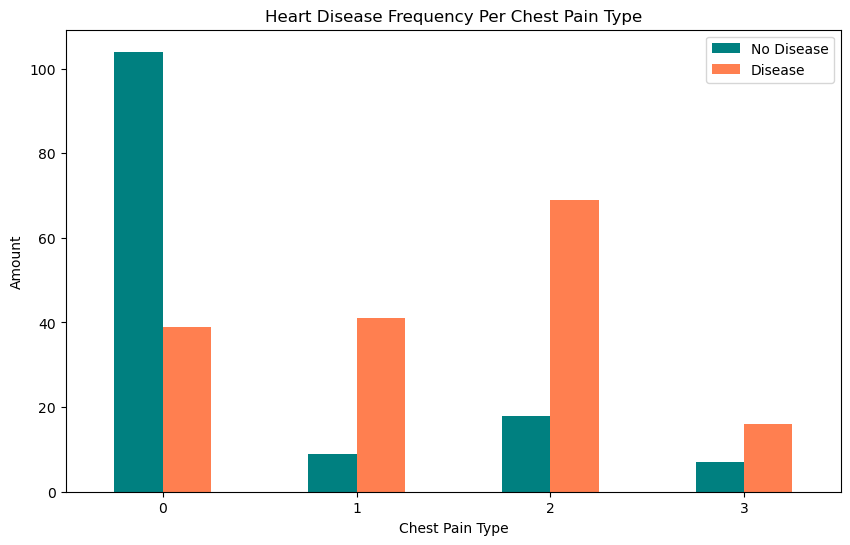

In [16]:
# plotting 

# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["teal", "coral"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease

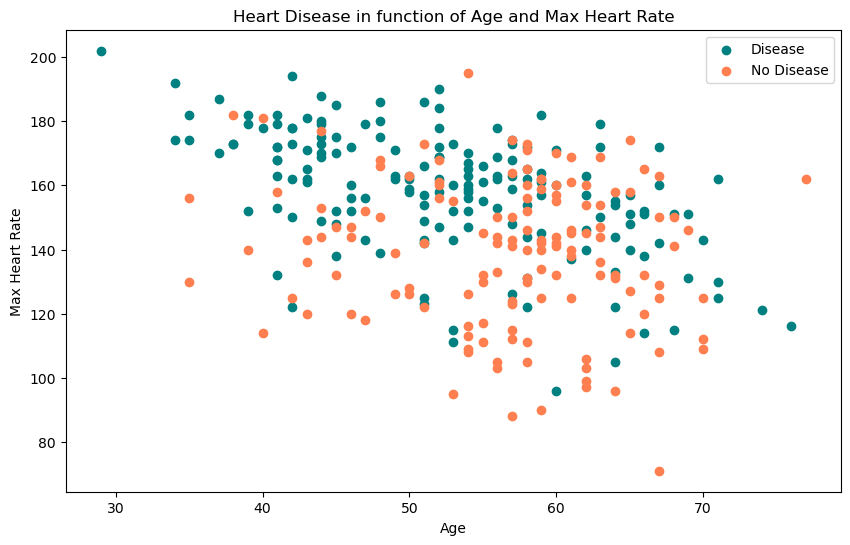

In [17]:
# create another figure
plt.figure(figsize=(10,6))


# scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="teal")



# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="coral")


# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

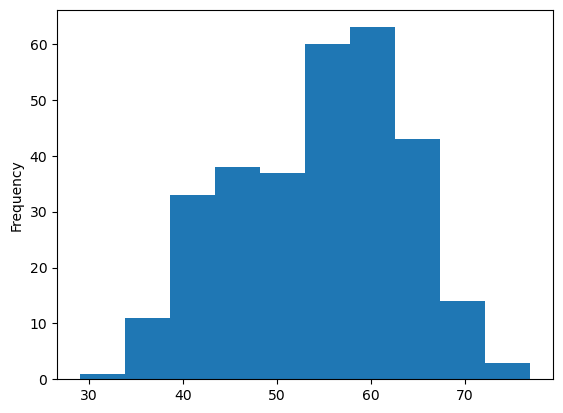

In [18]:
#check the distribution of age column with a histogram

df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type


 3.cp- Chest-pain type
 * 0 = Typical angina: chest pain related to decrease in blood supply to the heart 
 * 1 = Atypical angina: chest pain not related to heart
 * 2 = Non—anginal pain: typically esophageal spasms (non heart related)
 * 3 = Asymptotic: chest: chest pain not showing signs of disease

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


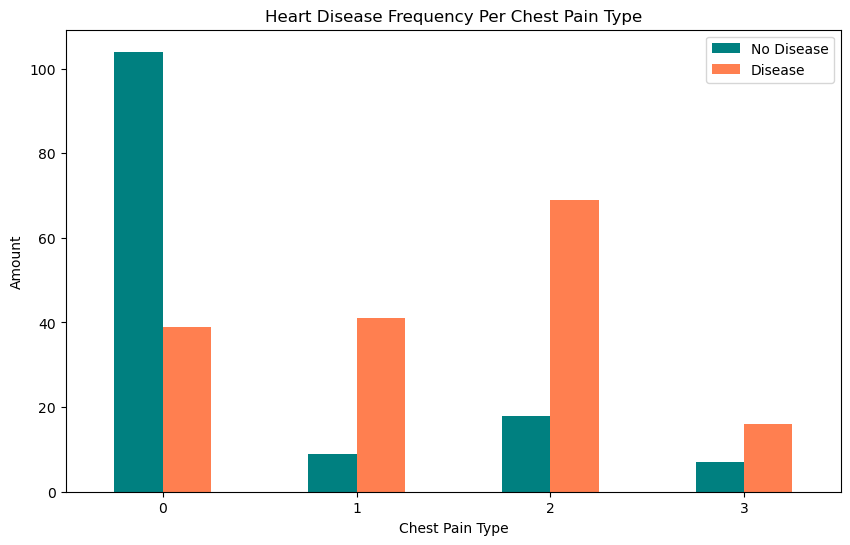

In [20]:
# Make the crosstab more visual

pd.crosstab(df.cp,df.target).plot(kind="bar",color=["teal","coral"],figsize=(10,6))

# Customize the plot
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


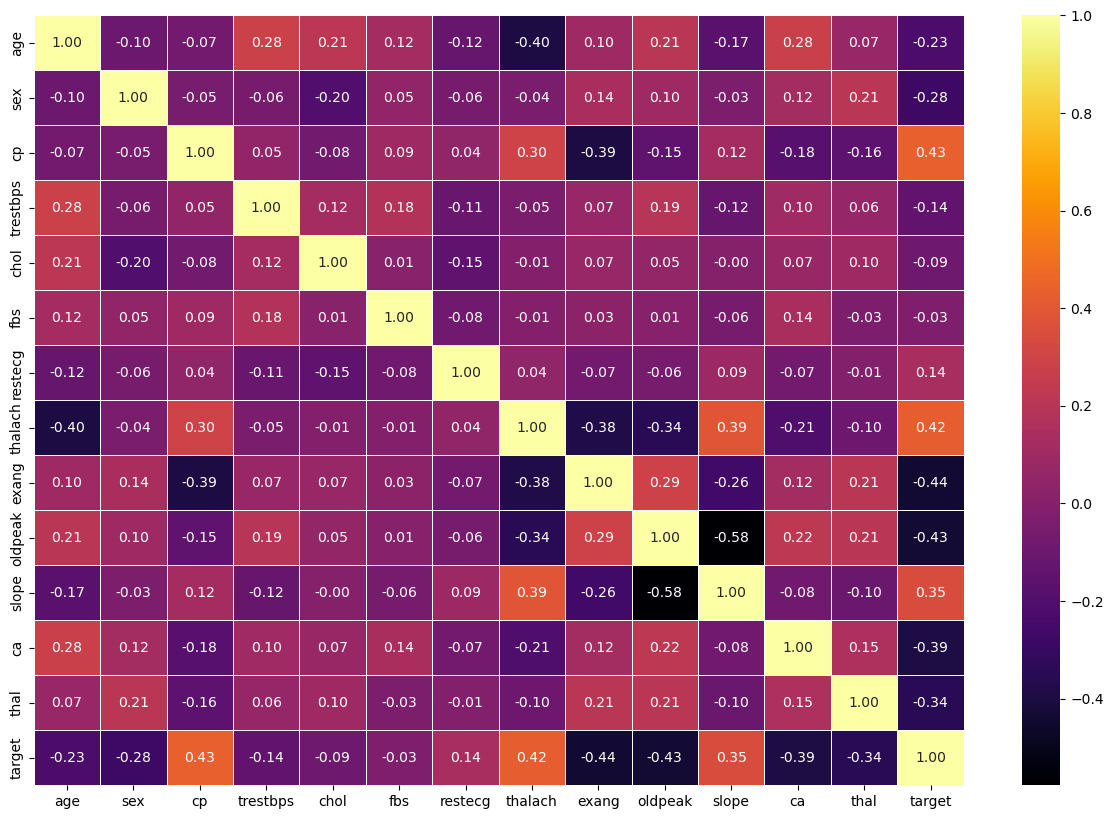

In [23]:
# Let's make our correlation matrix little prettier

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='inferno');# cmap = 'YlGnBu'

## 5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Split the data into x and y 

x = df.drop("target",axis=1)
y = df["target"]

In [26]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
# Split into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2


In [30]:
y_train

130    1
112    1
172    0
168    0
66     1
      ..
265    0
39     1
140    1
27     1
243    0
Name: target, Length: 242, dtype: int64

In [31]:
len(y_train)

242

Now we have got our data split into train and test sets,it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [32]:
# put model into a dictionary

models = {"Logistic Regression":LogisticRegression(),
          "RandomForestClassifier":RandomForestClassifier(),
          "KNN":KNeighborsClassifier()}

# create a model to fit and and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """"
    Fits and evaluates the given machine learning models.
    models: A dict of different sklearn machine learning models
    x_train: training data (no labels)
    x_test: testing data(no labels)
    y_train: training labels
    y_test: test labels
    
    """
    # set up random seed
    np.random.seed(42)
    # make the dictionary to keep model scores
    model_scores={ }
    # Loop through models
    for name, model in models.items():
        # Fit the model to data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [33]:
model_scores =  fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

print(model_scores)

/home/akash/anaconda3/envs/Machine_learning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541, 'RandomForestClassifier': 0.8032786885245902, 'KNN': 0.639344262295082}


## Model Comparision

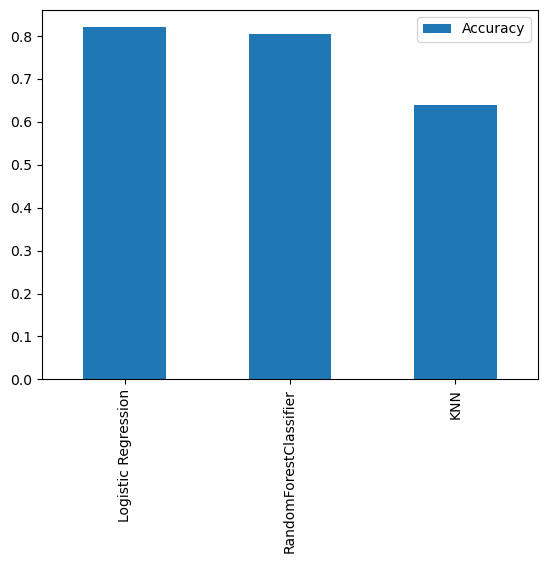

In [34]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar(); # transposing and plotting

Now we have got a baseline model and we know a model's first prediction are'nt always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* classification report
* ROC Curve
* Area under the curve(AUC)

## Hyperparameter Tuning (by hand)

In [35]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through differnt n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))
    
    

In [36]:
train_scores

[1.0,
 0.7933884297520661,
 0.7727272727272727,
 0.756198347107438,
 0.7644628099173554,
 0.7355371900826446,
 0.7355371900826446,
 0.7024793388429752,
 0.7231404958677686,
 0.7024793388429752,
 0.7355371900826446,
 0.731404958677686,
 0.743801652892562,
 0.71900826446281,
 0.7148760330578512,
 0.71900826446281,
 0.7024793388429752,
 0.7148760330578512,
 0.7272727272727273,
 0.7231404958677686]

In [37]:
test_scores

[0.5737704918032787,
 0.639344262295082,
 0.6229508196721312,
 0.6721311475409836,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082,
 0.6557377049180327,
 0.6065573770491803,
 0.639344262295082,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.5901639344262295,
 0.6557377049180327]

Maximum KNN score on the test data:  68.85%


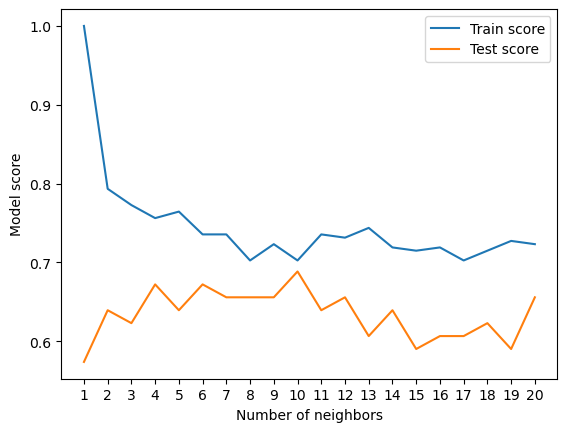

In [38]:
# Plotting Model score vs Number of neigbors for better visulize

plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100: .2f}%")


## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:

* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [39]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

Now we have got hyperparameter grids setup for each of our models,let's tune them using RandomizedSearchCV..

In [40]:
# Tune LogisticRegression

np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
rs_log_reg.score(x_test,y_test)

0.8360655737704918

Now we have tuned LogisticRegression(),let's do the same for RandomForestClassifier()..

In [43]:
# setup random seed

np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          verbose=True,
                          cv=5,
                          n_iter=20)

# Fit the random hyperparameter model for RandomForestClassifier
rs_rf.fit(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
# Find the best hyperparameters
rs_rf.best_params_


{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [45]:
# Evaluate the randomized search RandomRandomForestClassifier model
rs_rf.score(x_test,y_test)

0.9508196721311475

## Hyperparameter Tuning With GridSearcGridSearchCV
Since our LogisticRegresssion() model provides the best score so far, we will try to improve them again using GridSearchCV..

In [46]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setup grid hyperparameter for LogLogisticRegression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                         cv=5,
                         verbose=True,
                         param_grid=log_reg_grid)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [48]:
# Evaluate the grid search using LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.9508196721311475

## Evaluating our tuned machine learing classifier,beyond accuracy

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

It would be great if cross validation was used where possible.

To make comparisons and evaluate our trained model,first we need to make predictions.

In [49]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [50]:
y_test

0      1
276    0
77     1
31     1
115    1
      ..
282    0
5      1
196    0
154    1
244    0
Name: target, Length: 61, dtype: int64

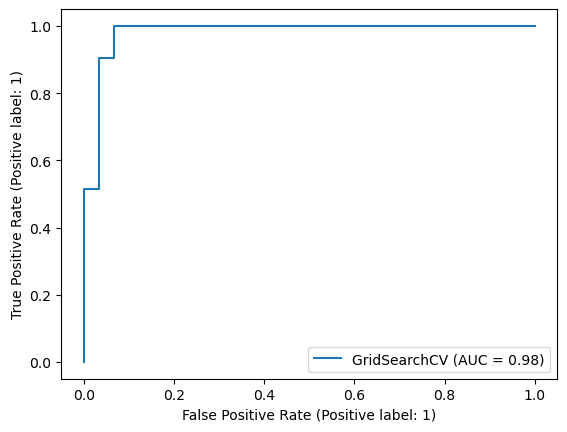

In [51]:
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test);

In [52]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[28  2]
 [ 1 30]]


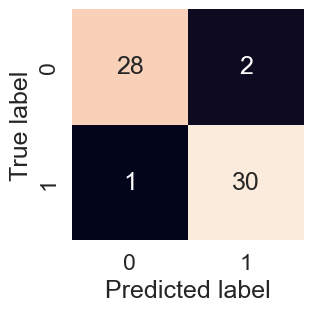

In [53]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test,y_preds)

Now we have got ROC curve, an metric and a confusion matrix,let's get a classification report as well as cross-validated precision,recall and f1-score.

In [54]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.94      0.97      0.95        31

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



## Calculate evaluation metrics using cross-validation

We're going to calculate accuracy,precision,recall and f1-score of our model using cross validation and to do so we'll be using  `Cross_val_score()`.

In [55]:
# check the best hyperparameter
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [56]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=1.3738237958832638,
                        solver="liblinear")

In [57]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8215300546448088

In [58]:
# Cross validated precision
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.817900063251107

In [59]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [60]:
# Cross validated f1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8431741323998502

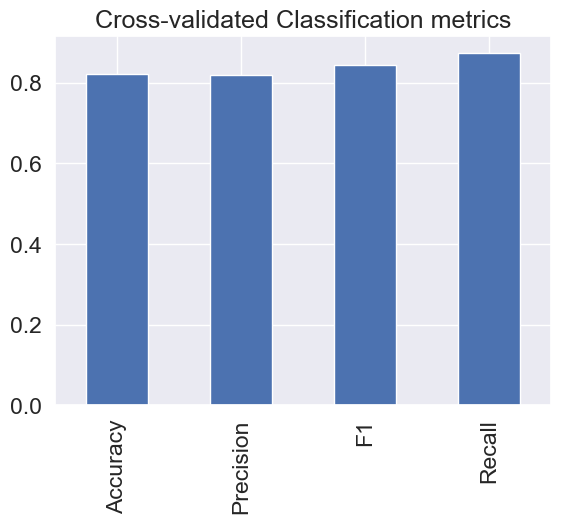

In [61]:
# Visulaize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "F1":cv_f1,
                          "Recall":cv_recall},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification metrics",
                     legend=False);

## Feature Importance

-  Feature is another as asking ,"Which features contributed most to the outcomes of the model and how did they contribute?"
-  Finding feature importance is different for each machine learning model.One way to find feature importance is to search for "(MODEL NAME) feature importance".
- Let's find the feature importance of our LogisticRegression model...

In [62]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=2.592943797404667,
                        solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=2.592943797404667, solver='liblinear')

In [63]:
clf.coef_

array([[ 1.08353070e-03, -1.48030028e+00,  7.31297045e-01,
        -1.77631085e-02, -1.72921807e-03,  6.79452755e-01,
         8.74795717e-01,  3.10927435e-02, -9.47532646e-01,
        -4.51856149e-01,  3.73595607e-01, -6.58927230e-01,
        -9.47303595e-01]])

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0010835306989882775,
 'sex': -1.4803002836187253,
 'cp': 0.7312970447061403,
 'trestbps': -0.017763108465551732,
 'chol': -0.0017292180729839921,
 'fbs': 0.6794527551782265,
 'restecg': 0.8747957166726719,
 'thalach': 0.031092743540269356,
 'exang': -0.9475326462328827,
 'oldpeak': -0.4518561490963872,
 'slope': 0.37359560674497017,
 'ca': -0.6589272304418844,
 'thal': -0.9473035946601327}

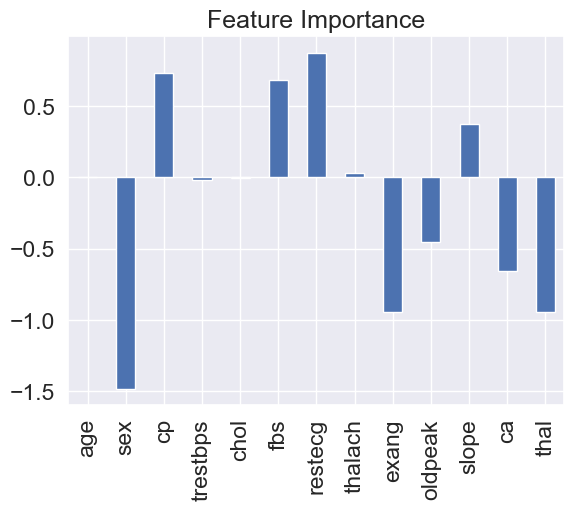

In [66]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(legend=False,title="Feature Importance");

In [67]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [68]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak excercise ST segment

- 0: Upsloping: better heart rate with excercise(uncommon)
- 1: Flatsloping: minimal change (typical health heart)
- 2: Downsloping: signs of unhealthy heart

## 6. Experimentation

If our model does'nt hit evaluation matrix yet.. ask yourself the following questions..

- Could you collect more data?
- Could you try better model? Like CatBoost or XGBoost?
- Could you improve the current models? (beyond what we have done so far)
- If your model is good enough(you have hit your evaluation metrics) how would you export it and share it with others?